# _Gradients_ Cruise Data

Here we retrieve [SCOPE-Gradients](http://scope.soest.hawaii.edu/data/gradients/data/) cruise data from the [Simons' CMAP](https://cmap.readthedocs.io/en/latest/) data base.

<img src="../figs/cbiomes-01.png" alt="Drawing" style="height: 100px;"/>

_Pre-requisites:_

- 1. _install the [PyCmap](https://github.com/simonscmap/pycmap) python package and its dependencies using `pip`_
- 2. _compile [PyCall.jl](https://github.com/simonscmap/pycmap) using external python distribution that installed `PyCmap`_
- 3. _obtain your own API key from [Simons' CMAP](https://simonscmap.com) (free; takes `<30s`)_
- 4. _import `pycmap` (via `pycall`), `Plots`, and `helper functions`_

In [1]:
if false
    run(`pip install pycmap`) #pycmap is used via PyCall later
    run(pipeline(`which python`,"whichpython.txt")) #external python path
    ENV["PYTHON"]=readline("whichpython.txt")
    import Pkg; Pkg.build("PyCall")
end

### Import _pycmap_ , _Plots_ , and  _helper functions_

[PyCmap](https://github.com/simonscmap/pycmap) is the `Python` API that we will use in `julia`, via the [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) package, to query the `CMAP` data base. `Plots.jl` is one of `julia`'s plotting packages.

_You may need to replace `your-own-API-key` (as outline below) with your own API key from [Simons' CMAP](https://simonscmap.com) and uncomment the command below._

In [2]:
using PyCall
PyCmap = pyimport("pycmap")
#cmap = PyCmap.API(token="your-own-API-key")
cmap = PyCmap.API()

using Plots
include("helper_functions.jl")

gradients_list

### Get Data Catalog

_The commented `df.to_csv` command writes the content of `df` to a new `catalog.csv` file. Alternatively, `Pandas.jl` can be used as also shown._

In [3]:
df = cmap.get_catalog()
#df.to_csv("catalog.csv")

#df=Pandas.DataFrame(cmap.get_catalog())
#to_csv(df,"catalog.csv")

,Variable,Table_Name,Long_Name,Unit,Make,Sensor,Process_Level,Study_Domain,Temporal_Resolution,Spatial_Resolution,Time_Min,Time_Max,Lat_Min,Lat_Max,Lon_Min,Lon_Max,Depth_Min,Depth_Max,Variable_25th,Variable_50th,Variable_75th,Variable_Count,Variable_Mean,Variable_Std,Variable_Min,Variable_Max,Comment,Dataset_Name,Data_Source,Distributor,Dataset_Description,Acknowledgement,Dataset_ID,ID,Visualize,Keywords
0,vgosa,tblAltimetry_REP,Geostrophic velocity anomalies: meridian compo...,m/s,Observation,Satellite,Reprocessed,Physics,Daily,1/4Â° X 1/4Â°,1993-01-01T00:00:00.000Z,2018-06-10T00:00:00.000Z,-89.875000,89.875000,-179.8750,179.875,NaN,NaN,NaN,NaN,NaN,5.361397e+09,-8.547000e-07,0.142801,-4.995600,4.999000,The geostrophic velocity anomalies are referen...,Sea Surface Height and Derived Variables (Repr...,SL-TAC,http://marine.copernicus.eu/,The reprocessed altimetry dataset in CMAP was ...,Data was provided by: E.U. Copernicus Marine S...,8,2,1.0,"daily, geostrophic velocity anomalies, meridia..."
1,vgos,tblAltimetry_REP,Absolute geostrophic velocity: meridian component,m/s,Observation,Satellite,Reprocessed,Physics,Daily,1/4Â° X 1/4Â°,1993-01-01T00:00:00.000Z,2018-06-10T00:00:00.000Z,-89.875000,89.875000,-179.8750,179.875,NaN,NaN,NaN,NaN,NaN,5.337270e+09,1.365396e-03,0.153150,-5.485500,5.214400,surface_geostrophic_northward_sea_water_velocity,Sea Surface Height and Derived Variables (Repr...,SL-TAC,http://marine.copernicus.eu/,The reprocessed altimetry dataset in CMAP was ...,Data was provided by: E.U. Copernicus Marine S...,8,6,1.0,"daily, geostrophic, meridian component, observ..."
2,sla,tblAltimetry_REP,Sea Level Anomaly,m,Observation,Satellite,Reprocessed,Physics,Daily,1/4Â° X 1/4Â°,1993-01-01T00:00:00.000Z,2018-06-10T00:00:00.000Z,-89.875000,89.875000,-179.8750,179.875,NaN,NaN,NaN,NaN,NaN,5.494281e+09,3.448953e-02,0.091852,-1.745000,2.266100,The sea level anomaly is the sea surface heigh...,Sea Surface Height and Derived Variables (Repr...,SL-TAC,http://marine.copernicus.eu/,The reprocessed altimetry dataset in CMAP was ...,Data was provided by: E.U. Copernicus Marine S...,8,9,1.0,"daily, observation, physics, reprocessed, sate..."
3,adt,tblAltimetry_REP,Absolute Dynamic Topography,m,Observation,Satellite,Reprocessed,Physics,Daily,1/4Â° X 1/4Â°,1993-01-01T00:00:00.000Z,2018-06-10T00:00:00.000Z,-89.875000,89.875000,-179.8750,179.875,NaN,NaN,NaN,NaN,NaN,5.449859e+09,3.383828e-01,0.688690,-2.182100,2.834200,The absolute dynamic topography is the sea sur...,Sea Surface Height and Derived Variables (Repr...,SL-TAC,http://marine.copernicus.eu/,The reprocessed altimetry dataset in CMAP was ...,Data was provided by: E.U. Copernicus Marine S...,8,10,1.0,"absolute dynamic topography, adt, daily, obser..."
4,ugosa,tblAltimetry_REP,Geostrophic velocity anomalies: zonal component,m/s,Observation,Satellite,Reprocessed,Physics,Daily,1/4Â° X 1/4Â°,1993-01-01T00:00:00.000Z,2018-06-10T00:00:00.000Z,-89.875000,89.875000,-179.8750,179.875,NaN,NaN,NaN,NaN,NaN,5.361397e+09,1.676976e-04,2.936698,-214748.313500,4.992900,The geostrophic velocity anomalies are referen...,Sea Surface Height and Derived Variables (Repr...,SL-TAC,http://marine.copernicus.eu/,The reprocessed altimetry dataset in CMAP was ...,Data was provided by: E.U. Copernicus Marine S...,8,11,1.0,"daily, geostrophic velocity anomalies zonal co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,PO4,tblKOK1606_Gradients1_Nutrients,Dissolved Phosphate,umol/L,Observation,In-Situ,Reprocessed,Biogeochemistry,Irregular,Irregular,2016-04-21T00:03:10.000Z,2016-05-03T20:39:10.000Z,23.571167,37.738333,-158.1565,-157.916,4.430837,992.367622,0.063617,0.218875,0.498452,9.700000e+01,2.863391e-01,0.223310,0.023459,0.687710,NaN,Cruise KOK1606 Gradients 1 Organic and Inorgan...,"University of Hawaii - Manoa, David Karl lab","University of Hawaii - Manoa, David Karl lab",All organic and inorganic nut

### Download & Reload Data Set

The lists provided by `gradients_list()` contain `CMAP table` names associated with the [SCOPE-Gradients](http://scope.soest.hawaii.edu/data/gradients/data/) cruise data. 

In [4]:
if false
    pth="../samples/gradients/"
    !isdir("$pth") ? mkdir("$pth") : nothing
    
    list0=gradients_list("main")
    for i in list0
        df=cmap.get_dataset(i)
        df.to_csv("$pth$i.csv")
    end
    
    using CSV, DataFrames
    df = CSV.File("$pth"*"tblKM1906_Gradients3_uway_optics.csv") |> DataFrame!
end

### Read Data & Meta-Data

As an example below we read the `LISST` data collected during the `Gradients 3` cruise and then plot a subset of the data.

In [11]:
s=cmap_get("tblKM1906_Gradients3_uway_optics","LISST_small")
m=cmap_get("tblKM1906_Gradients3_uway_optics","LISST_medium")
l=cmap_get("tblKM1906_Gradients3_uway_optics","LISST_large")

Dict{String,Any} with 8 entries:
  "Long_Name"   => "LISST C 20-100.0 micron"
  "Unit"        => "umol C/L"
  "lat"         => [21.2464, 21.2464, 21.2464, 21.2464, 21.2465, 21.2465, 21.24…
  "time"        => ["2019-04-10T00:39:37", "2019-04-10T00:42:07", "2019-04-10T0…
  "Variable"    => "LISST_large"
  "val"         => [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, N…
  "lon"         => [-158.034, -158.037, -158.041, -158.045, -158.048, -158.052,…
  "Data_Source" => "Prof. Dr. Angelicque A. White, University of Hawaii, aewhit…

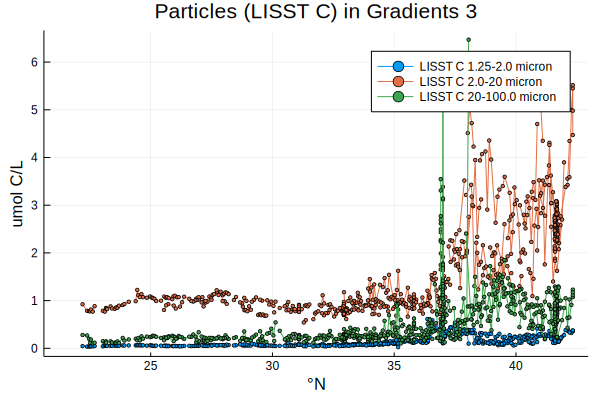

In [12]:
t=1:10:length(s["lat"])
Plots.plot(s["lat"][t],s["val"][t],marker = 2,label=s["Long_Name"],
    xlabel="°N",ylabel=s["Unit"], title="Particles (LISST C) in Gradients 3")
Plots.plot!(m["lat"][t],m["val"][t],marker = 2,label=m["Long_Name"])
Plots.plot!(l["lat"][t],l["val"][t],marker = 2,label=l["Long_Name"])

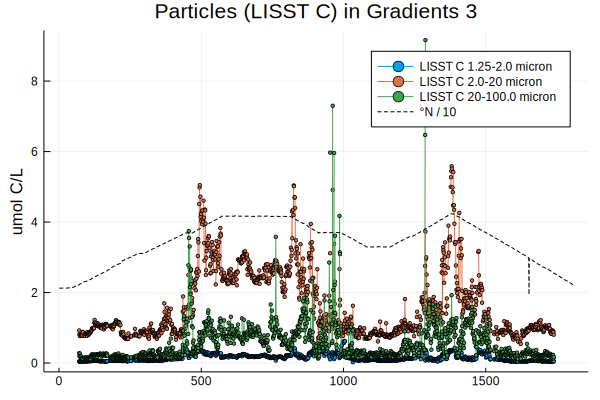

In [13]:
t=1:5:length(s["lat"])
Plots.plot(s["val"][t],marker = 2,label=s["Long_Name"],
    ylabel=s["Unit"], title="Particles (LISST C) in Gradients 3")
Plots.plot!(m["val"][t],marker = 2,label=m["Long_Name"])
Plots.plot!(l["val"][t],marker = 2,label=l["Long_Name"])
Plots.plot!(s["lat"][t]/10,linecolor=:black,linestyle = :dash,label="°N / 10")

In [14]:
#cmap.get_dataset_metadata("tblMGL1704_Gradients2_uway_optics")

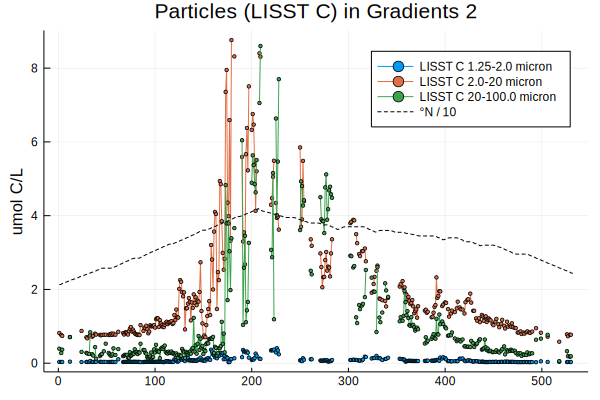

In [15]:
s=cmap_get("tblMGL1704_Gradients2_uway_optics","LISST_small")
m=cmap_get("tblMGL1704_Gradients2_uway_optics","LISST_medium")
l=cmap_get("tblMGL1704_Gradients2_uway_optics","LISST_large")

t=1:5:length(s["lat"])
Plots.plot(s["val"][t],marker = 2,label=s["Long_Name"],
    ylabel=s["Unit"], title="Particles (LISST C) in Gradients 2")
Plots.plot!(m["val"][t],marker = 2,label=m["Long_Name"])
Plots.plot!(l["val"][t],marker = 2,label=l["Long_Name"])
Plots.plot!(s["lat"][t]/10,linecolor=:black,linestyle = :dash,label="°N / 10")

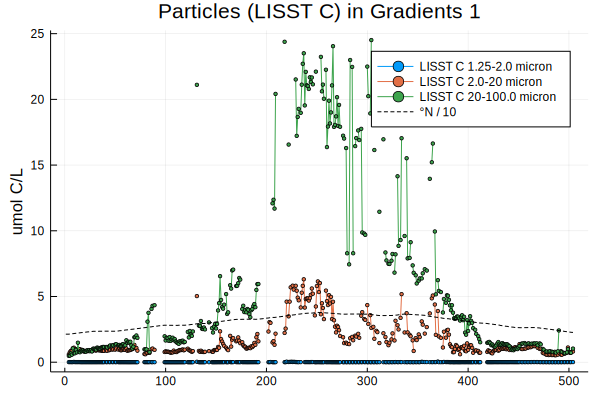

In [16]:
s=cmap_get("tblKOK1606_Gradients1_uway_optics","LISST_small")
m=cmap_get("tblKOK1606_Gradients1_uway_optics","LISST_medium")
l=cmap_get("tblKOK1606_Gradients1_uway_optics","LISST_large")

t=1:5:length(s["lat"])
Plots.plot(s["val"][t],marker = 2,label=s["Long_Name"],
    ylabel=s["Unit"], title="Particles (LISST C) in Gradients 1")
Plots.plot!(m["val"][t],marker = 2,label=m["Long_Name"])
Plots.plot!(l["val"][t],marker = 2,label=l["Long_Name"])
Plots.plot!(s["lat"][t]/10,linecolor=:black,linestyle = :dash,label="°N / 10")